In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

In [2]:
import pandas as pd
flights = pd.read_csv(r"C:\Users\ahisse\Documents\Flatiron\ML_Capstone\Project\sample_project\FlightDelays.csv")

In [3]:
flights.shape

(2201, 13)

In [4]:
flights.DAY_WEEK = flights.DAY_WEEK.astype('category')

#flights.CRS_DEP_TIME = [round(t / 100) for t in flights.CRS_DEP_TIME]
flights.CRS_DEP_TIME = flights.CRS_DEP_TIME.astype('category')

flights['isDelayed'] = [1 if status == 'delayed' else 0 for status in flights['Flight Status']]

flights

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,isDelayed
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,0
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime,0
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime,0
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,0
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime,0
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime,0
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime,0
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime,0


In [5]:
flights['CARRIER'].value_counts()

DH    551
RU    408
US    404
DL    388
MQ    295
CO     94
UA     31
OH     30
Name: CARRIER, dtype: int64

In [6]:

#The Original

predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'DEP_TIME']
outcome = 'isDelayed'

X = pd.get_dummies(flights[predictors], drop_first=True) #convert predictors into dummies
y = flights[outcome] # target variable, which was converted into dummies earlier
classes = ['ontime', 'delayed']

categorical_predictors = ['CARRIER', 'DEST', 'ORIGIN', 'TAIL_NUM']
numerical_predictors = ['CRS_DEP_TIME', 'DISTANCE', 'FL_NUM', 'DAY_WEEK','DAY_OF_MONTH']
#outcome = 'isDelayed'

scaler = StandardScaler()
scaled_data = scaler.fit_transform(flights[numerical_predictors])

dummies_data = pd.get_dummies(flights[categorical_predictors], drop_first=True)

X = pd.concat([pd.DataFrame(scaled_data),pd.DataFrame(dummies_data)])

#X = pd.get_dummies(flights[predictors], drop_first=True) #convert predictors into dummies
y = flights[outcome] # target variable, which was converted into dummies earlier
classes = ['ontime', 'delayed']


scaled_data.shape #(2201,5)
#dummies_data.shape #(2201,559)
#X

In [7]:
y.value_counts()

0    1773
1     428
Name: isDelayed, dtype: int64

In [8]:
X #predictors

,DEP_TIME,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,CRS_DEP_TIME_630,CRS_DEP_TIME_640,CRS_DEP_TIME_645,...,ORIGIN_IAD,DEST_JFK,DEST_LGA,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,1455,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1640,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1245,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,1709,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,1035,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,644,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2197,1653,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2198,1558,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2199,1403,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
#from sklearn import preprocessing 
#scalar = preprocessing.StandardScaler()
#X_standardized = scalar.fit_transform(X) #
#X_standardized

In [10]:
#Here we encode the predictor, ontime would be 1 and delayed would be 0
from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#y = labelencoder.fit_transform(flights['Flight Status'])
#y



In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0) #train, test split

In [21]:
weights = {0: 0.30, 1: 0.70}
logreg = LogisticRegression()
logreg.fit(X_train, y_train) #fit the train data set

C:\Users\ahisse\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
coef = pd.DataFrame(logreg.coef_[0], index = X.columns,columns=['Coefficients']) # the weights of the predictors
coef.sort_values(by=['Coefficients'], ascending = False)

,Coefficients
CRS_DEP_TIME_640,1.237418
CRS_DEP_TIME_1455,0.943549
CARRIER_MQ,0.709271
CRS_DEP_TIME_1730,0.618229
CRS_DEP_TIME_1515,0.536750
...,...
CARRIER_OH,-0.842148
DAY_WEEK_4,-0.926945
CRS_DEP_TIME_1645,-1.114027
DAY_WEEK_6,-1.347449


In [23]:
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_[0]), index = X.columns,columns = ['Odds']) #odds
df.sort_values(by=['Odds'], ascending = True)

,Odds
CARRIER_US,0.253538
DAY_WEEK_6,0.259903
CRS_DEP_TIME_1645,0.328234
DAY_WEEK_4,0.395761
CARRIER_OH,0.430784
...,...
CRS_DEP_TIME_1515,1.710439
CRS_DEP_TIME_1730,1.855639
CARRIER_MQ,2.032509
CRS_DEP_TIME_1455,2.569084


In [24]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
#accuracy as one evaluation metrics
from sklearn import metrics
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy::0.812


In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

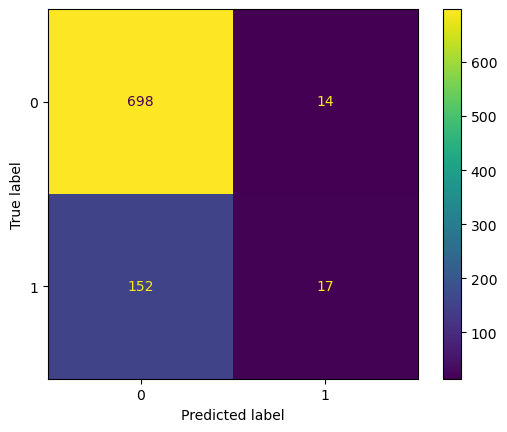

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

# interpret confuison matrix
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(X_test, y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12, color="white")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.imshow(cm, cmap='viridis')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       712
           1       0.55      0.10      0.17       169

    accuracy                           0.81       881
   macro avg       0.68      0.54      0.53       881
weighted avg       0.77      0.81      0.75       881



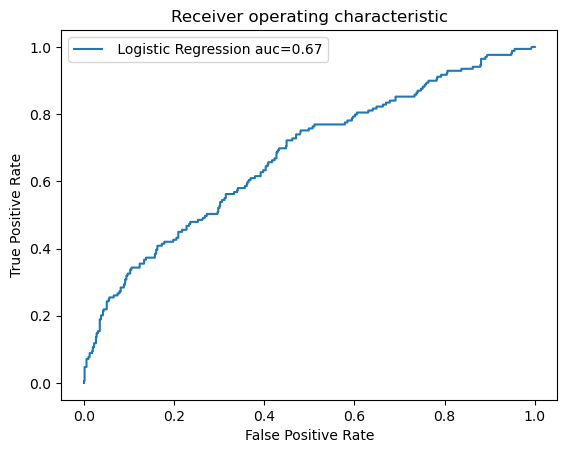

In [20]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc.round(2)))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()

# SMOTE - Class imbalance resolution

In [61]:
# Determine desired balance ratio (e.g., 70/30 for non-delayed/delayed)
#desired_ratio = 0.25  # Aim for X% delayed flights

In [62]:
sm = SMOTE(random_state=43)

In [63]:
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [64]:
print(y_train_resampled.value_counts())
# Originally the classes were resample at perfect split

0    1061
1    1061
Name: isDelayed, dtype: int64


In [65]:
logreg.fit(X_train_resampled,y_train_resampled)

C:\Users\ahisse\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.3, 1: 0.7})

In [66]:
coef1 = pd.DataFrame(logreg.coef_[0], index = X_train_resampled.columns,columns=['Coefficients']) # the weights of the predictors
coef1.sort_values(by=['Coefficients'], ascending = False)

,Coefficients
CRS_DEP_TIME_640,0.580406
CRS_DEP_TIME_700,0.502502
CRS_DEP_TIME_1455,0.424880
CRS_DEP_TIME_800,0.371807
CARRIER_MQ,0.119749
...,...
DAY_WEEK_3,-1.800102
CARRIER_RU,-2.209788
DAY_WEEK_4,-2.211500
DAY_WEEK_6,-2.372909


In [67]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [68]:
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy::0.661


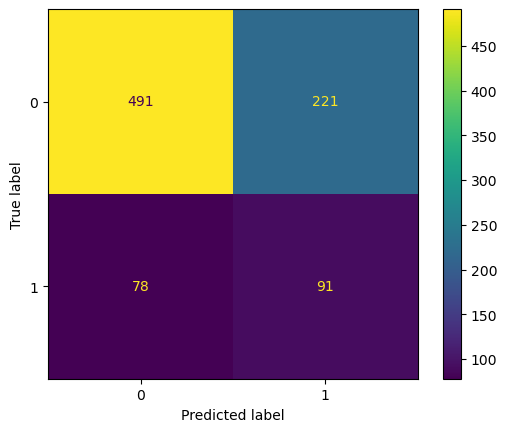

In [69]:
smote_cnf_matrix = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=smote_cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77       712
           1       0.29      0.54      0.38       169

    accuracy                           0.66       881
   macro avg       0.58      0.61      0.57       881
weighted avg       0.75      0.66      0.69       881



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12, color="white")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.imshow(cm, cmap='viridis')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)
plt.show()

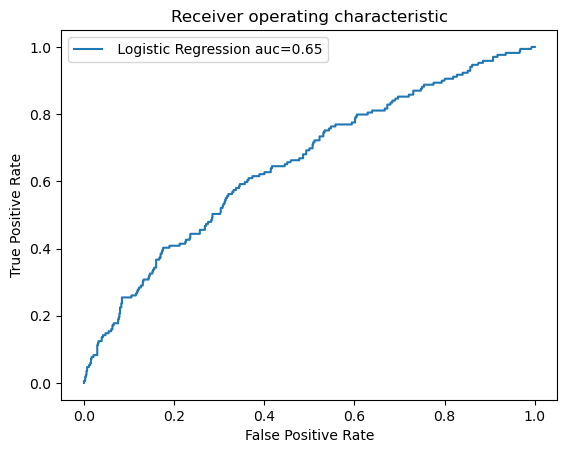

In [30]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc.round(2)))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()

# Decesion Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0, criterion="entropy")

In [73]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [74]:
print('Accuracy on training set:',tree.score(X_train, y_train))

Accuracy on training set: 0.990909090909091


In [75]:
dt_y_pred = tree.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
print("Accuracy on test set:",accuracy_score(dt_y_pred, y_test))

Accuracy on test set: 0.8524404086265607


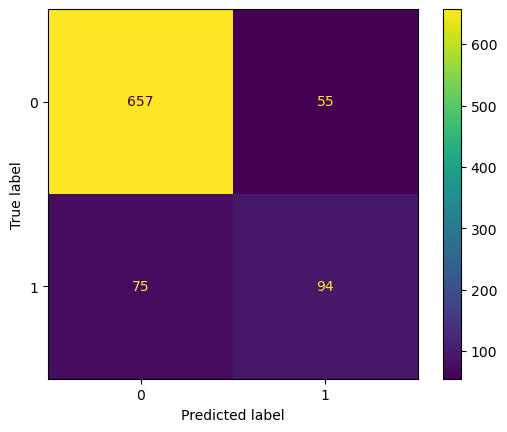

In [77]:
dt_cnf_matrix = confusion_matrix(y_test, dt_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

In [78]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       712
           1       0.63      0.56      0.59       169

    accuracy                           0.85       881
   macro avg       0.76      0.74      0.75       881
weighted avg       0.85      0.85      0.85       881



In [78]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       712
           1       0.63      0.56      0.59       169

    accuracy                           0.85       881
   macro avg       0.76      0.74      0.75       881
weighted avg       0.85      0.85      0.85       881



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12, color="white")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)
plt.imshow(cm, cmap='viridis')

plt.show()

In [37]:
tree_pruned = DecisionTreeClassifier(max_depth=6, random_state=0, criterion= "entropy")
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

In [38]:
#Accuracy Score
print("Accuracy on training set:",tree_pruned.score(X_train, y_train).round(3))
print("Accuracy on test set:",accuracy_score(y_pruned_pred, y_test))

Accuracy on training set: 0.854
Accuracy on test set: 0.8433598183881952


In [39]:
importance = pd.DataFrame(tree_pruned.feature_importances_, index = X.columns, columns = ["Importance"])
importance.sort_values(by = "Importance", ascending = False)

,Importance
DEP_TIME,0.477669
CRS_DEP_TIME_1455,0.175751
CARRIER_US,0.052137
ORIGIN_DCA,0.050004
CARRIER_DL,0.043659
...,...
CRS_DEP_TIME_645,0.000000
CRS_DEP_TIME_630,0.000000
CRS_DEP_TIME_1515,0.000000
CRS_DEP_TIME_1520,0.000000


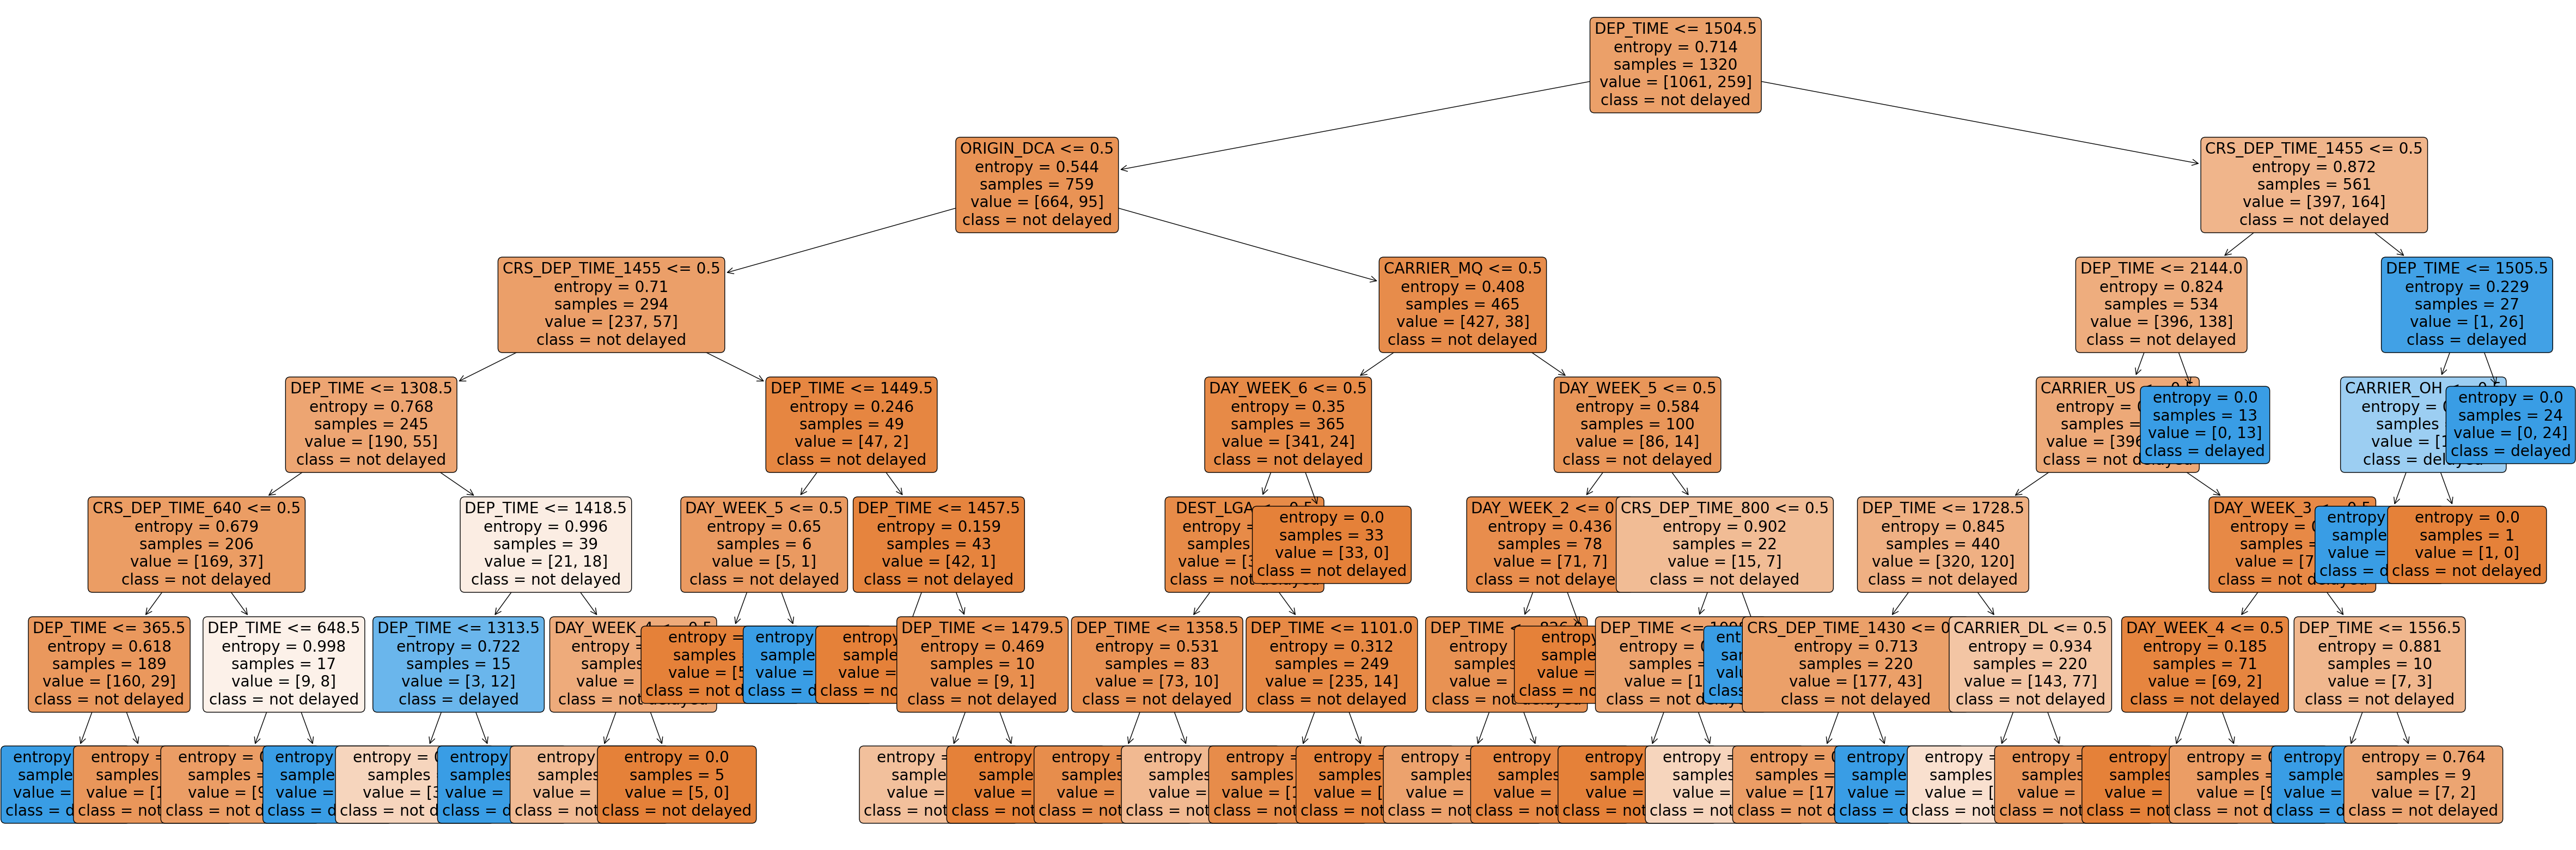

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,20))
display_tree = plot_tree(tree_pruned, 
              feature_names=X_train.columns, 
              class_names=["not delayed", "delayed"], 
              filled=True, 
              rounded=True,
              fontsize=20)

In [41]:
tree_pruned.predict_proba(X_test)

array([[0.91970803, 0.08029197],
       [0.56962025, 0.43037975],
       [0.56962025, 0.43037975],
       ...,
       [0.91428571, 0.08571429],
       [0.56962025, 0.43037975],
       [1.        , 0.        ]])

In [42]:
y_pruned_pred_proba = tree_pruned.predict_proba(X_test)[:,1]

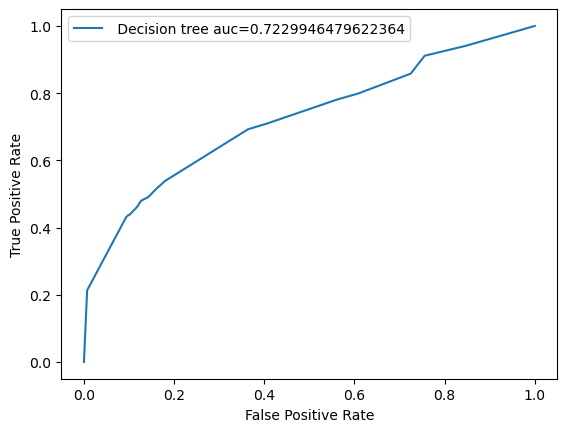

In [43]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y_pruned_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pruned_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()

# RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [48]:
y_pred_forest = rf.predict(X_test_forest)

In [49]:
accuracy = accuracy_score(y_test_forest, y_pred_forest)
print("Accuracy:", accuracy)

Accuracy: 0.9342403628117913


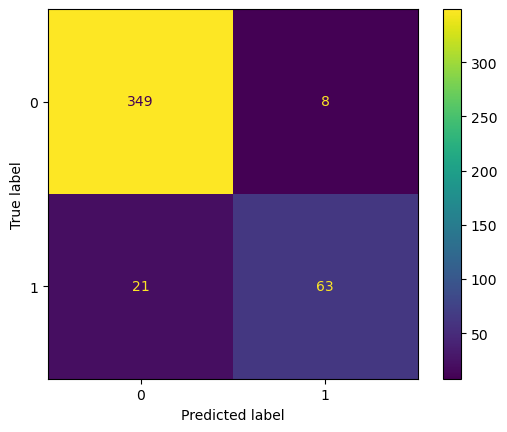

In [50]:
rt_cnf_matrix = confusion_matrix(y_test_forest, y_pred_forest, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rt_cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

In [79]:
print(classification_report(y_test_forest, y_pred_forest))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       357
           1       0.89      0.75      0.81        84

    accuracy                           0.93       441
   macro avg       0.92      0.86      0.89       441
weighted avg       0.93      0.93      0.93       441



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_forest, y_pred_forest)
plt.imshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12, color="white")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.imshow(cm, cmap='viridis')
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)
plt.show()

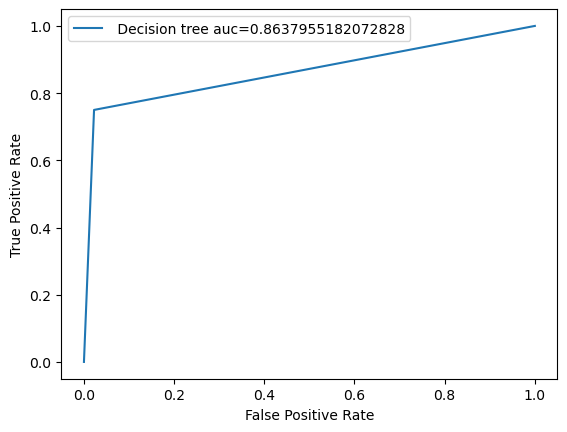

In [51]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test_forest, y_pred_forest)
auc = metrics.roc_auc_score(y_test_forest, y_pred_forest)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()